# Orbit Homework

In [174]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [175]:
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
AU = UNITS.astronomical_unit
yr = UNITS.year

r_0 = (1 * AU).to_base_units()
v_0 = 0 * m / s

<Quantity(0.0, 'meter / second')>

In [186]:
init = State(x = 1 * AU,
             y = .00000001 * AU,
             vx = 0 * m/s,
             vy = -3.033e4 * m/s)

,values
x,1 astronomical_unit
y,1e-08 astronomical_unit
vx,0.0 meter / second
vy,-30330.0 meter / second


In [187]:
system = System(init=init,                
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,                
                m2=5.972e24 * kg,                
                t_end=1e6 * s)

,values
init,x 1 astronomical_unit y 1e-08 astr...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
m2,5.972e+24 kilogram
t_end,1000000.0 second


In [223]:
def universal_gravitation(state, system):
    """Computes gravitational force.
    state: State object with position and velocity
    system: System object with m1, m2, and G    """
    
    x,y,vx,vy = state
    unpack(system)
    
    p = Vector(x,y)
    force_mag = G*m1*m2/p.mag**2
    direction = -p.hat()
    
    Force = force_mag*direction
    
    return Force

In [224]:
universal_gravitation(init, system)

<Quantity([-7.92758276e+44 -7.92758276e+36], 'meter ** 2 * newton / astronomical_unit ** 2')>

In [225]:
def slope_func(state, t, system):
    """Compute derivatives of the state."""
    
    x,y,vx,vy = state
    unpack(system)
    
    Force = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = -Force.x / m2
    dvydt = -Force.y / m2
    
    drdt = Vector(dxdt,dydt)
    dvdt = Vector(dvxdt,dvydt)
    
    return dxdt,dydt,dvxdt,dvydt #drdt,dvdt

In [226]:
slope_func(init, 0, system)

AttributeError: Neither Quantity object nor its magnitude ([-7.92758276e+44 -7.92758276e+36]) has attribute 'x'

In [227]:
results, details = run_ode_solver(system, slope_func, max_step = .1 * s)
details#.message

AttributeError: Neither Quantity object nor its magnitude ([-7.92758276e+44 -7.92758276e+36]) has attribute 'x'

In [219]:
def event_func(state, t, system):
    """Stop when the y coordinate is 0.
    
    state: State object
    t: time
    system: System object
    
    returns: y coordinate
    """
    x, y = 1, .00000001
    return x,y

event_func(system.init, 0, system)

(1, 1e-08)

In [220]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[]]
nfev,1034
njev,0
nlu,0
status,-1
message,Required step size is less than spacing betwee...
success,False


In [207]:
x_dist = get_last_value(results.x) * m

<Quantity(1.0, 'meter')>

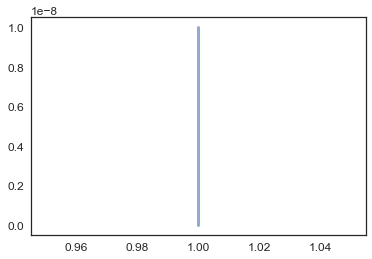

In [173]:
plot(results.x, results.y, label='trajectory')